## Are votes for a new party explained by the votes for old parties?


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

## I. Getting the data on votes

### 1) Data for votes on the 04.04.2021 election from CIK*
I have removed the last 8 columns from the original CIK file manualy, because they are for two candidates that are on the balot only in couple of sections and pandas cannot read the file. They have a total of 428 votes.

In [3]:
votes_1 = pd.read_csv('data/votes_04.04.2021.csv', sep = ';', header = None)

In [4]:
votes_1

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,10100001,1,1,7,5,2,2,0,0,0,...,104,14,29,82,58,24,30,0,0,0
1,10100002,1,1,11,9,2,2,2,2,0,...,111,14,29,56,38,18,30,1,0,1
2,10100003,1,1,9,9,0,2,0,0,0,...,115,19,29,68,39,29,30,0,0,0
3,10100004,1,1,9,5,4,2,0,0,0,...,135,16,29,46,32,14,30,0,0,0
4,10100005,1,1,12,8,4,2,0,0,0,...,86,32,29,39,21,18,30,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12936,326700461,32,1,7,7,0,2,1,1,0,...,53,0,29,162,162,0,30,2,2,0
12937,326800462,32,1,2,2,0,2,0,0,0,...,18,0,29,85,85,0,30,0,0,0
12938,326800463,32,1,1,1,0,2,0,0,0,...,13,0,29,46,46,0,30,1,1,0
12939,326800464,32,1,8,8,0,2,1,1,0,...,58,0,29,120,120,0,30,1,1,0


In [5]:
votes_1 = votes_1[[0,3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119]]

In [6]:
votes_1['Total'] = votes_1[[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119]].sum(axis=1)

<ipython-input-6-e3ec44d64682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votes_1['Total'] = votes_1[[3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119]].sum(axis=1)


In [7]:
votes_1 = votes_1[[0,15,35,43,71,111,115,'Total']]

In [8]:
votes_1 = votes_1.rename(columns=
              {0: "section",
               15: "BSP1",
               35: "DPS1",
               43: "DB1",
               71: "ISMV1",
               111: "GERB1",
               115: "ITN1"})

In [9]:
votes_1

,section,BSP1,DPS1,DB1,ISMV1,GERB1,ITN1,Total
0,10100001,77,0,25,14,118,82,401
1,10100002,50,0,40,21,125,56,375
2,10100003,48,1,18,12,134,68,336
3,10100004,73,0,34,14,151,46,406
4,10100005,54,1,37,12,118,39,358
...,...,...,...,...,...,...,...,...
12936,326700461,36,1,284,28,53,162,682
12937,326800462,16,8,71,15,18,85,282
12938,326800463,13,6,79,13,13,46,205
12939,326800464,48,32,125,28,58,120,517


Checking whether there are no duplicate sections:

In [10]:
len(votes_1.section.unique()), len(votes_1.section)

(12941, 12941)

Checking whether the numbers votes match the official CIK info:

In [11]:
votes_1 = votes_1.set_index('section')

In [12]:
print("GERB :", votes_1.GERB1.sum())
print("ITN :", votes_1.ITN1.sum())
print("BSP :", votes_1.BSP1.sum())
print("DPS :", votes_1.DPS1.sum())
print("DB :", votes_1.DB1.sum())
print("ISMV :", votes_1.ISMV1.sum())
print("Total :",votes_1.Total.sum())

GERB : 837707
ITN : 565014
BSP : 480146
DPS : 336306
DB : 302280
ISMV : 150940
Total : 3199293


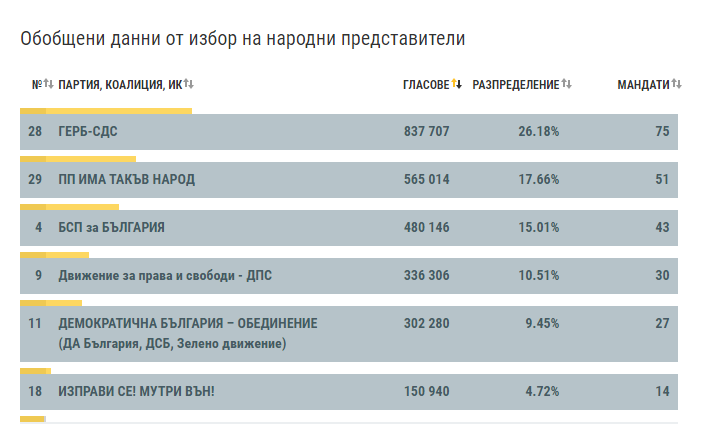

### 2) Data for votes on the 11.07.2021 election from CIK
I have removed the last 2 columns from the original CIK file manualy, because they are for two candidates that are on the balot only in couple of sections and pandas cannot read the file. They have a total of 182 votes.

In [13]:
votes_2 = pd.read_csv('data/votes_11.07.2021.csv', sep = ';', header = None)

In [14]:
votes_2 

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,32,10100001,1,1,1,2,0,3,1,4,...,19,0,20,1,21,0,22,90,23,33
1,32,10100002,1,1,1,2,0,3,0,4,...,19,0,20,1,21,0,22,79,23,40
2,32,10100003,1,1,0,2,1,3,0,4,...,19,0,20,0,21,0,22,88,23,26
3,32,10100004,1,1,0,2,0,3,0,4,...,19,0,20,0,21,3,22,80,23,52
4,32,10100005,1,1,0,2,0,3,0,4,...,19,0,20,0,21,3,22,61,23,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14328,41,326700780,32,1,0,2,0,3,0,4,...,19,1,20,1,21,1,22,51,23,49
14329,28,326700781,32,1,0,2,0,3,0,4,...,19,0,20,1,21,0,22,66,23,55
14330,28,326700782,32,1,0,2,0,3,0,4,...,19,0,20,0,21,0,22,56,23,49
14331,28,326800783,32,1,0,2,0,3,0,4,...,19,0,20,0,21,0,22,7,23,47


In [15]:
votes_2 = pd.concat([votes_2.loc[0:,1],votes_2.loc[0:,4::2]], axis = 1)

In [16]:
votes_2['Total'] = votes_2.loc[0:,2:].sum(axis = 1)

In [17]:
votes_2 = votes_2[[1,10,12,16,18,46,48,'Total']]

In [18]:
votes_2

,1,10,12,16,18,46,48,Total
0,10100001,55,84,0,33,90,33,337
1,10100002,41,104,0,25,79,40,327
2,10100003,48,94,0,13,88,26,292
3,10100004,62,106,0,18,80,52,348
4,10100005,42,74,5,30,61,34,291
...,...,...,...,...,...,...,...,...
14328,326700780,6,14,3,5,51,49,151
14329,326700781,9,13,6,8,66,55,186
14330,326700782,4,15,2,10,56,49,157
14331,326800783,3,6,1,4,7,47,76


In [19]:
votes_2 = votes_2.rename(columns=
              {1: "section",
               10: "BSP2",
               16: "DPS2",
               48: "DB2",
               18: "ISMV2",
               12: "GERB2",
               46: "ITN2"})

Checking whether there are no duplicate sections:

In [20]:
len(votes_2.section.unique()), len(votes_2.section)

(13005, 14333)

There are duplicate sections, because the votes from paper ballots and machine votes form the same section are shown on 2 separete rows. The votes have to be added to form a single row for the section.

In [21]:
votes_2 = votes_2.groupby(['section']).sum().reset_index()

In [22]:
len(votes_2.section.unique()), len(votes_2.section)

(13005, 13005)

In [23]:
votes_2 = votes_2.set_index('section')

In [24]:
votes_2

,BSP2,GERB2,DPS2,ISMV2,ITN2,DB2,Total
section,,,,,,,
10100001,55,84,0,33,90,33,337
10100002,41,104,0,25,79,40,327
10100003,48,94,0,13,88,26,292
10100004,62,106,0,18,80,52,348
10100005,42,74,5,30,61,34,291
...,...,...,...,...,...,...,...
326700780,13,41,13,10,106,98,327
326700781,9,13,6,8,66,55,186
326700782,4,15,2,10,56,49,157


In [25]:
print("ITN :", votes_2.ITN2.sum())
print("GERB :", votes_2.GERB2.sum())
print("BSP :", votes_2.BSP2.sum())
print("DB :", votes_2.DB2.sum())
print("DPS :", votes_2.DPS2.sum())
print("ISMV :", votes_2.ISMV2.sum())
print("Total :",votes_2.Total.sum())

ITN : 657829
GERB : 642165
BSP : 365695
DB : 345331
DPS : 292514
ISMV : 136885
Total : 2731510


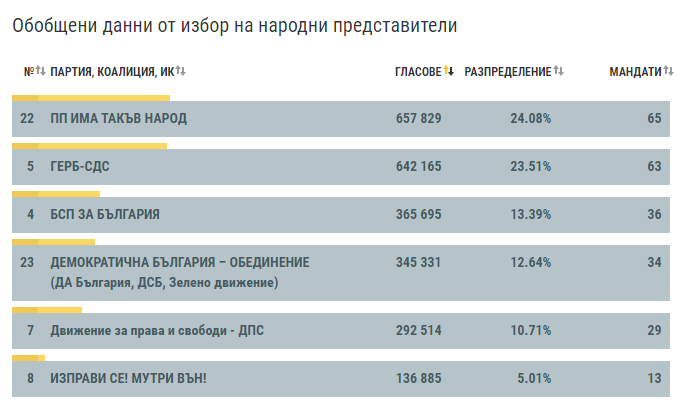

### 3) Data for votes on the 14.11.2021 election from CIK
I have removed the last 2 columns from the original CIK file manualy, because they are for one candidate that is on the balot only in few sections and pandas cannot read the file. He has a total of 142 votes.

In [26]:
votes_3 = pd.read_csv('data/votes_14.11.2021.csv', sep = ';', header = None)

In [27]:
votes_3

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,32,10100001,1,2,1,4,1,5,3,7,...,32,40,33,23,34,0,35,1,36,0
1,32,10100001,1,2,2,4,1,5,7,7,...,32,44,33,19,34,0,35,1,36,0
2,32,10100002,1,2,0,4,0,5,3,7,...,32,42,33,17,34,0,35,0,36,0
3,32,10100002,1,2,0,4,1,5,9,7,...,32,55,33,11,34,0,35,0,36,0
4,32,10100003,1,2,2,4,1,5,5,7,...,32,80,33,28,34,1,35,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15611,28,326700752,32,2,0,4,0,5,5,7,...,32,1,33,0,34,0,35,0,36,0
15612,28,326700753,32,2,0,4,0,5,32,7,...,32,20,33,8,34,0,35,0,36,0
15613,28,326700754,32,2,0,4,0,5,12,7,...,32,25,33,5,34,1,35,1,36,0
15614,28,326800755,32,2,0,4,0,5,4,7,...,32,8,33,4,34,0,35,0,36,0


In [28]:
votes_3 = pd.concat([votes_3.loc[0:,1],votes_3.loc[0:,4::2]], axis = 1)

In [29]:
votes_3['Total'] = votes_3.loc[0:,2:].sum(axis = 1)

In [30]:
votes_3 = votes_3[[1,8,22,32,34,44,48,50,'Total']]

In [31]:
votes_3 = votes_3.rename(columns=
              {1: "section",
               8:  "Vyzr3", 
               50: "BSP3",
               22: "DPS3",
               44: "DB3",
               34: "PP3",
               48: "GERB3",
               32: "ITN3"})

Checking whether there are no duplicate sections:

In [32]:
len(votes_3.section.unique()), len(votes_3.section)

(13238, 15616)

There are duplicate sections, because the votes from paper ballots and machine votes form the same section are shown on 2 separete rows. The votes have to be added to form a single row for the section.

In [33]:
votes_3 = votes_3.groupby(['section']).sum().reset_index()

In [34]:
len(votes_3.section.unique()), len(votes_3.section)

(13238, 13238)

In [35]:
votes_3 = votes_3.set_index('section')

In [36]:
votes_3

,Vyzr3,DPS3,ITN3,PP3,DB3,GERB3,BSP3,Total
section,,,,,,,,
10100001,10,0,37,106,10,84,42,329
10100002,12,0,31,92,20,97,28,301
10100003,5,1,35,49,12,80,28,238
10100004,5,0,24,106,15,104,46,324
10100005,10,2,22,88,14,68,20,264
...,...,...,...,...,...,...,...,...
326700752,5,11,5,36,8,1,0,68
326700753,32,1,37,66,41,20,8,215
326700754,12,14,34,70,38,25,5,215


In [37]:
print("PP :", votes_3.PP3.sum())
print("GERB :", votes_3.GERB3.sum())
print("DPS :", votes_3.DPS3.sum())
print("BSP :", votes_3.BSP3.sum())
print("ITN :", votes_3.ITN3.sum())
print("DB :", votes_3.DB3.sum())
print("Vyzr :", votes_3.Vyzr3.sum())
print("Total :",votes_3.Total.sum())

PP : 673170
GERB : 596456
DPS : 341000
BSP : 267817
ITN : 249743
DB : 166968
Vyzr : 127568
Total : 2622621


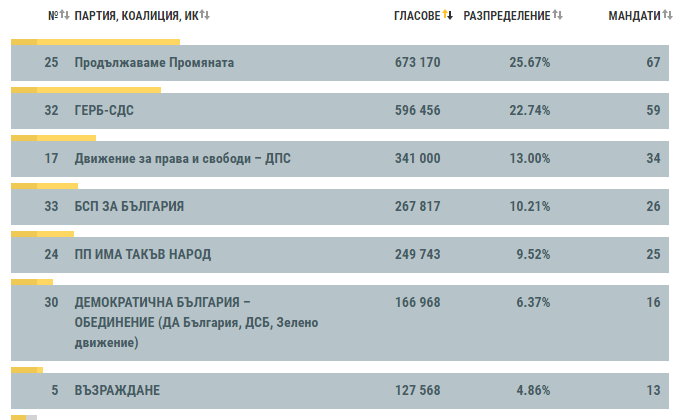

### 4) Data for votes on the 02.10.2022 election from CIK
I have removed the last 2 columns from the original CIK file manualy, because they are for two candidates that are on the balot only in couple of sections and pandas cannot read the file. They have a total of 564 votes.

In [38]:
votes_4 = pd.read_csv('data/votes_02.10.2022.csv', sep = ';', header = None)

In [39]:
votes_4 = pd.concat([votes_4.loc[0:,1],votes_4.loc[0:,4::2]], axis = 1)

In [40]:
votes_4['Total'] = votes_4.loc[0:,2:].sum(axis = 1)

In [41]:
votes_4 = votes_4[[1,4,20,30,32,40,48,50,56,'Total']]

In [42]:
votes_4 = votes_4.rename(columns=
              {1: "section",
               30:  "Vyzr4",
               32:  "BV4",
               56: "BSP4",
               4: "DPS4",
               50: "DB4",
               20: "PP4",
               48: "GERB4",
               40: "ITN4"})

Checking whether there are no duplicate sections:

In [43]:
len(votes_4.section.unique()), len(votes_4.section)

(12932, 14311)

There are duplicate sections, because the votes from paper ballots and machine votes form the same section are shown on 2 separete rows. The votes have to be added to form a single row for the section.

In [44]:
votes_4 = votes_4.groupby(['section']).sum().reset_index()

In [45]:
len(votes_4.section.unique()), len(votes_4.section)

(12932, 12932)

In [46]:
votes_4 = votes_4.set_index('section')

In [47]:
votes_4

,DPS4,PP4,Vyzr4,BV4,ITN4,GERB4,DB4,BSP4,Total
section,,,,,,,,,
10100001,2,72,30,22,10,84,14,38,285
10100002,1,70,21,15,11,82,9,40,268
10100003,0,41,22,13,5,85,6,30,209
10100004,1,57,21,8,4,114,24,45,279
10100005,1,46,19,13,2,84,15,46,244
...,...,...,...,...,...,...,...,...,...
326100751,18,167,78,4,12,51,92,8,462
326100752,4,69,42,6,16,20,44,9,217
326100753,20,59,29,4,12,17,39,3,191


In [48]:
print("GERB :", votes_4.GERB4.sum())
print("PP :", votes_4.PP4.sum())
print("DPS :", votes_4.DPS4.sum())
print("Vyzr :", votes_4.Vyzr4.sum())
print("BSP :", votes_4.BSP4.sum())
print("DB :", votes_4.DB4.sum())
print("DB :", votes_4.DB4.sum())
print("BV :", votes_4.BV4.sum())
print("ITN :", votes_4.ITN4.sum())
print("Total :",votes_4.Total.sum())

GERB : 634627
PP : 506099
DPS : 344512
Vyzr : 254952
BSP : 232958
DB : 186528
DB : 186528
BV : 115872
ITN : 96071
Total : 2504707


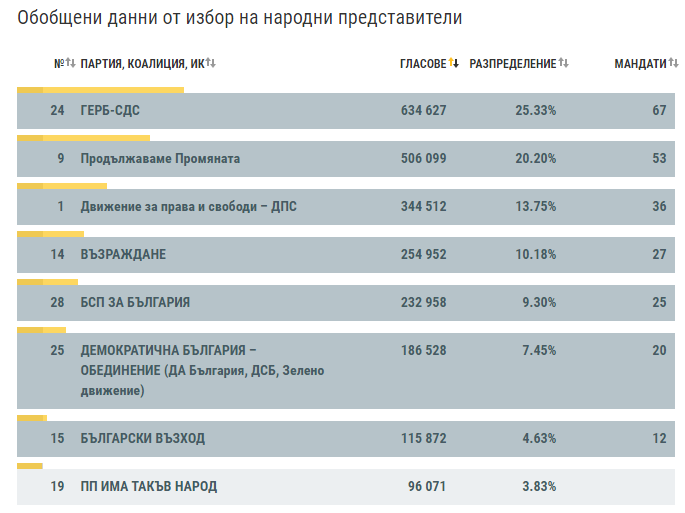

### 5) Getting all the features into one table

In [49]:
votes = votes_1.join(votes_2, how = 'inner', lsuffix = '', rsuffix = '2').join(votes_3, how = 'inner', lsuffix = '', rsuffix = '3').join(votes_4, how = 'inner', lsuffix = '', rsuffix = '4').drop(['Total','Total2','Total3','Total4'], axis = 1)

In [50]:
votes

,BSP1,DPS1,DB1,ISMV1,GERB1,ITN1,BSP2,GERB2,DPS2,ISMV2,...,GERB3,BSP3,DPS4,PP4,Vyzr4,BV4,ITN4,GERB4,DB4,BSP4
section,,,,,,,,,,,,,,,,,,,,,
10100001,77,0,25,14,118,82,55,84,0,33,...,84,42,2,72,30,22,10,84,14,38
10100002,50,0,40,21,125,56,41,104,0,25,...,97,28,1,70,21,15,11,82,9,40
10100003,48,1,18,12,134,68,48,94,0,13,...,80,28,0,41,22,13,5,85,6,30
10100004,73,0,34,14,151,46,62,106,0,18,...,104,46,1,57,21,8,4,114,24,45
10100005,54,1,37,12,118,39,42,74,5,30,...,68,20,1,46,19,13,2,84,15,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320200016,49,14,174,24,63,111,8,35,0,17,...,36,21,0,48,40,5,21,32,26,8
320200017,14,4,37,4,9,26,9,29,2,15,...,33,7,10,80,54,19,11,35,28,9
320200018,6,25,7,4,3,18,6,20,2,16,...,35,9,4,81,72,4,18,46,45,15


## II. Performing linear regression on votes



### A) Performing simple linear regression with the votes for the new party as dependent variable and the votes for the other parties that enter parlament as features. The new parties are ITN, ISMV for the elections on 04.04.2021 and Vyzr and PP for the elections on 14.11.2021

### 1) ITN 04.04.2021

In [51]:
y = votes.ITN1
X = votes[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [52]:
print(reg.coef_)
print(reg.intercept_)
print('r2', r2_score(y_test, y_pred))

[ 0.41512943 -0.04212863  0.00768676  1.34354972  0.11606201]
3.255527810422116
r2 0.6173786595780233


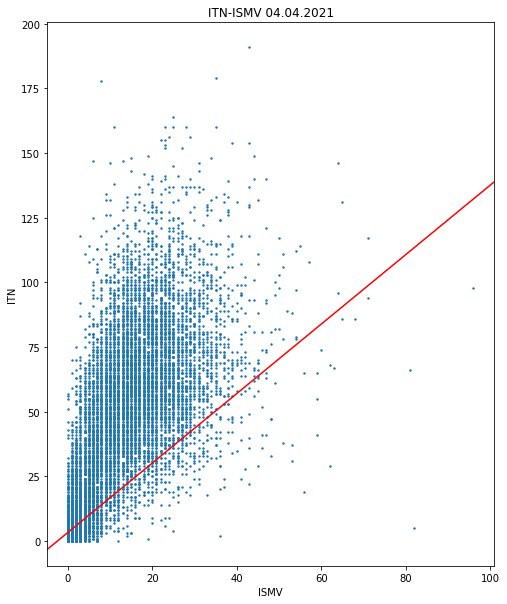

In [53]:
plt.figure(figsize = (8,10))
plt.title("ITN-ISMV 04.04.2021")
plt.scatter(votes.ISMV1, votes.ITN1,s = 2)
plt.axline((0, reg.intercept_), slope = reg.coef_[3], color='red')
plt.xlabel("ISMV")
plt.ylabel("ITN")
plt.show()

* I don't understand why the scatter plot and linear regression line are missmatched.

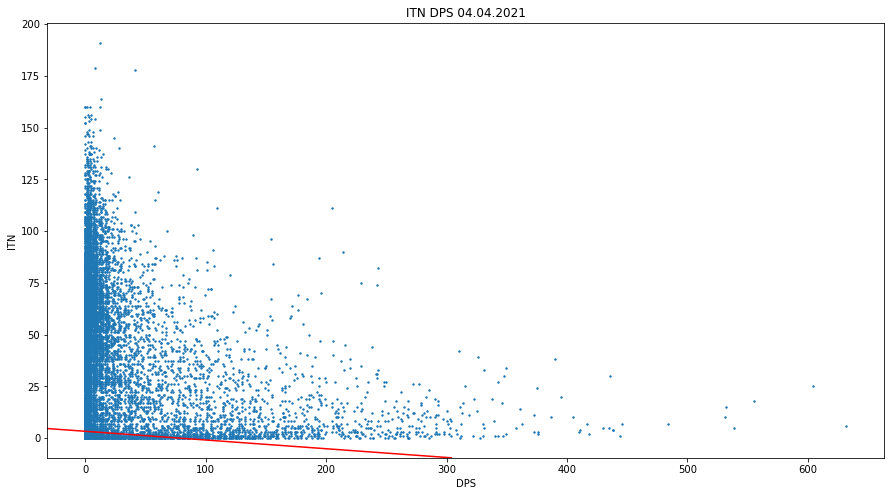

In [54]:
plt.figure(figsize = (15,8))
plt.title("ITN DPS 04.04.2021")
plt.scatter(votes.DPS1, votes.ITN1,s = 2)
plt.axline((0, reg.intercept_), slope = reg.coef_[1], color='red')
plt.xlabel("DPS")
plt.ylabel("ITN")
plt.show()

### 2) ISMV 04.04.2021

In [55]:
y = votes.ISMV1
X = votes[['BSP1', 'DPS1','DB1', 'ITN1', 'GERB1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [56]:
print(reg.coef_)
print('r2', r2_score(y_test, y_pred))

[ 0.06389344 -0.00961866  0.11914485  0.13467429  0.00666634]
r2 0.6270799231520647


### 3) Vyzr 14.11.2021

In [57]:
y = votes.Vyzr3
X = votes[['DPS3', 'ITN3', 'PP3', 'DB3', 'GERB3', 'BSP3']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [58]:
print(reg.coef_)
print('r2', r2_score(y_test, y_pred))

[-0.00645793  0.13093161  0.11062119 -0.02688039  0.02753594 -0.00052984]
r2 0.658500886592143


### 4) PP 14.11.2021

In [59]:
y = votes.PP3
X = votes[['DPS3', 'ITN3', 'Vyzr3', 'DB3', 'GERB3', 'BSP3']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [60]:
print(reg.coef_)
print('r2', r2_score(y_test, y_pred))

[-0.04726469  0.84303915  1.42734639  1.21416713  0.11491204  0.2216122 ]
r2 0.8514910106520035


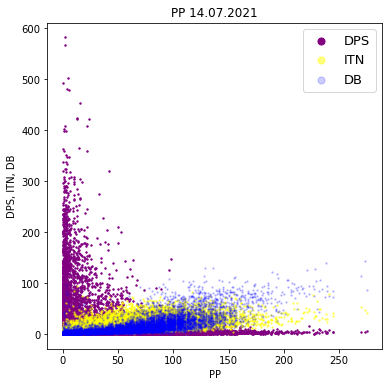

In [61]:
plt.figure(figsize = (6,6))
plt.title("PP 14.07.2021")
plt.scatter(votes.PP3, votes.DPS3,s = 2, c = "purple", label = 'DPS')
plt.scatter(votes.PP3, votes.ITN3,s = 2, c = "yellow", alpha = 0.5, label = 'ITN')
plt.scatter(votes.PP3, votes.DB3,s = 2, c = "blue", alpha = 0.2, label = 'DB')
plt.xlabel("PP")
plt.ylabel("DPS, ITN, DB")
plt.legend(markerscale=5,  fontsize=13)
plt.show()

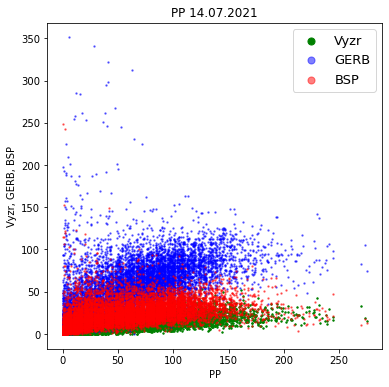

In [62]:
plt.figure(figsize = (6,6))
plt.title("PP 14.07.2021")
plt.scatter(votes.PP3, votes.Vyzr3,s = 2, c = "green", label = 'Vyzr')
plt.scatter(votes.PP3, votes.GERB3,s = 2, c = "blue", alpha = 0.5, label = 'GERB')
plt.scatter(votes.PP3, votes.BSP3,s = 2, c = "red", alpha = 0.5, label = 'BSP')
plt.xlabel("PP")
plt.ylabel("Vyzr, GERB, BSP")
plt.legend(markerscale=5,  fontsize=13)
plt.show()

### B) Adding more features. Let's see if the model is better if we add polynomial features.

I am using the first example the 04.04. 2021 elections and ITN

In [63]:
quad_feature_transformer = PolynomialFeatures(degree = 2, interaction_only = True)
y = votes.ITN1
X = votes[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X = quad_feature_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [64]:
print('r2', r2_score(y_test, y_pred))

r2 0.6461445969978263


It is a bit better

### C) Let's see what will happen if we train the model on a really small chunk of the data.

In [66]:
y = votes.ITN1
X = votes[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X = quad_feature_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size = 0.95, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [67]:
print('r2', r2_score(y_test, y_pred))

r2 0.6281120482727104


## III. Using Decision Tree Regressor
Let's see if another model is better than a linear regression. 

### A) Building the decision tree model on the 04.04.2021 elections.

### 1) Normalizing the data

In [68]:
scaler = StandardScaler().fit(votes)

In [69]:
votes_columns = votes.columns

In [70]:
votes_scaled = scaler.transform(votes)

In [71]:
votes_scaled = pd.DataFrame(votes_scaled)

In [72]:
votes_scaled.columns = votes_columns

In [73]:
votes_scaled.index = votes.index

In [74]:
votes_scaled

,BSP1,DPS1,DB1,ISMV1,GERB1,ITN1,BSP2,GERB2,DPS2,ISMV2,...,GERB3,BSP3,DPS4,PP4,Vyzr4,BV4,ITN4,GERB4,DB4,BSP4
section,,,,,,,,,,,,,,,,,,,,,
10100001,1.535969,-0.479368,0.076751,0.208823,1.078313,1.225504,1.276917,0.941228,-0.432975,2.496542,...,1.128335,1.354572,-0.424891,1.032317,0.721509,1.426557,0.431003,0.933806,-0.003187,1.366432
10100002,0.455953,-0.479368,0.548654,0.889256,1.228511,0.422296,0.571278,1.524625,-0.432975,1.597375,...,1.531371,0.425555,-0.444316,0.970193,0.127490,0.640124,0.589630,0.876934,-0.253477,1.509702
10100003,0.375952,-0.460792,-0.143469,0.014414,1.421623,0.793007,0.924097,1.232927,-0.432975,0.248624,...,1.004324,0.425555,-0.463741,0.069397,0.193492,0.415429,-0.362131,0.962243,-0.403651,0.793352
10100004,1.375966,-0.479368,0.359893,0.208823,1.786391,0.113370,1.629737,1.582965,-0.432975,0.810603,...,1.748390,1.620006,-0.444316,0.566388,0.127490,-0.146309,-0.520758,1.786891,0.497393,1.867876
10100005,0.615955,-0.460792,0.454273,0.014414,1.078313,-0.102878,0.621681,0.649529,-0.332575,2.159354,...,0.632291,-0.105312,-0.444316,0.224707,-0.004514,0.415429,-0.838012,0.933806,0.046871,1.939511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320200016,0.415952,-0.219312,4.764312,1.180870,-0.101816,2.121389,-1.092015,-0.488097,-0.432975,0.698208,...,-0.359797,-0.038954,-0.463741,0.286831,1.381529,-0.483351,2.175899,-0.544873,0.597509,-0.782617
320200017,-0.984068,-0.405066,0.454273,-0.763223,-1.260489,-0.504482,-1.041612,-0.663116,-0.392815,0.473416,...,-0.452805,-0.967971,-0.269492,1.280813,2.305558,1.089514,0.589630,-0.459565,0.697625,-0.710982
320200018,-1.304073,-0.014983,-0.489531,-0.763223,-1.389230,-0.751623,-1.192821,-0.925645,-0.392815,0.585812,...,-0.390799,-0.835254,-0.386042,1.311875,3.493595,-0.595699,1.700018,-0.146767,1.548611,-0.281172


### 2) Getting the features and splitting the data

In [75]:
y = votes_scaled.ITN1
X = votes_scaled[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

### 3) Finding the best parameters

In [76]:
grid = {"max_depth": [1, 5, 7, 15, 20],
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]}

In [77]:
grid_search = GridSearchCV(estimator = DecisionTreeRegressor(),
                          param_grid = grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 7, 15, 20],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 12]})

In [78]:
Decision_Regressor = grid_search.best_estimator_
print("Decision tree; best score:", grid_search.best_score_)

Decision tree; best score: 0.6893834076753963


In [79]:
Decision_Regressor

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=20, min_samples_leaf=2)

### 4) Scoring the model

In [80]:
Decision_Regressor_predict = Decision_Regressor.predict(X_test)
Decision_Regressor_score = r2_score(y_test, Decision_Regressor_predict)

In [81]:
Decision_Regressor_score 

0.68133261239489

The score is better than the linear regression, which was 0.617 without and 0.646 with polynomial features added 

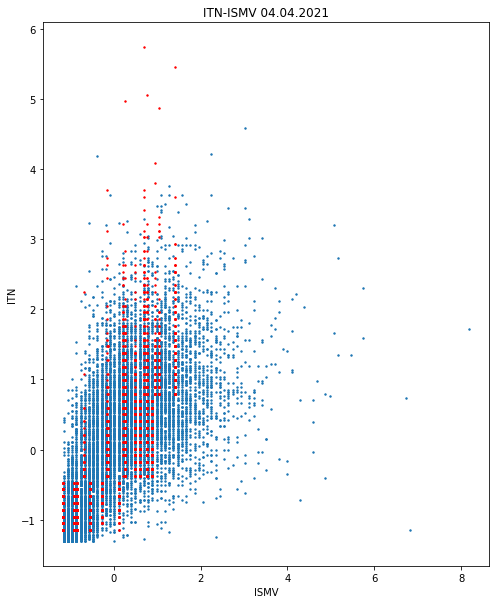

In [82]:
plt.figure(figsize = (8,10))
plt.title("ITN-ISMV 04.04.2021")
plt.scatter(votes_scaled.ISMV1, votes_scaled.ITN1,s = 2)
plt.scatter(Decision_Regressor_predict, X_test.ISMV1,s = 2, color='red')
plt.xlabel("ISMV")
plt.ylabel("ITN")
plt.show()

### B) Using the model built on on the 04.04.2021 elections on the 14.11.2021 elections.

In [83]:
y = votes_scaled.PP3
X = votes_scaled[['BSP3', 'DPS3','DB3', 'Vyzr3', 'GERB3']]

In [84]:
Decision_Regressor_predict = Decision_Regressor.predict(X)
Decision_Regressor_score = r2_score(y, Decision_Regressor_predict)

In [85]:
Decision_Regressor_score 

0.6441407475518702

### C) Using the model built on on the 14.11.2021 elections on the 02.10.2022 elections.

In [86]:
y = votes_scaled.PP3
X = votes_scaled[['BSP3', 'DPS3','DB3', 'Vyzr3', 'GERB3']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [87]:
grid = {"max_depth": [1, 5, 7, 15, 20],
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]}

In [88]:
grid_search = GridSearchCV(estimator = DecisionTreeRegressor(),
                          param_grid = grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 7, 15, 20],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 12]})

In [89]:
Decision_Regressor = grid_search.best_estimator_
print("Decision tree; best score:", grid_search.best_score_)

Decision tree; best score: 0.7936039792061413


In [90]:
y = votes_scaled.PP4
X = votes_scaled[['BSP4', 'DPS4','DB4', 'Vyzr4', 'GERB4']]

In [91]:
Decision_Regressor_predict = Decision_Regressor.predict(X)
Decision_Regressor_score = r2_score(y, Decision_Regressor_predict)

In [92]:
Decision_Regressor_score 

0.7867748231580443

## IV. Performing linear regression on percenigates 

### Trasforming the data

In [93]:
percent_1 = votes_1.divide(votes_1.Total, axis = 0).drop('Total', axis = 1)
percent_2 = votes_2.divide(votes_2.Total, axis = 0).drop('Total', axis = 1)
percent_3 = votes_3.divide(votes_3.Total, axis = 0).drop('Total', axis = 1)
percent_4 = votes_4.divide(votes_4.Total, axis = 0).drop('Total', axis = 1)

In [94]:
percent = percent_1.join(percent_2, how = 'inner', lsuffix = '', rsuffix = '2').join(percent_3, how = 'inner', lsuffix = '', rsuffix = '3').join(percent_4, how = 'inner', lsuffix = '', rsuffix = '4')

In [95]:
percent

,BSP1,DPS1,DB1,ISMV1,GERB1,ITN1,BSP2,GERB2,DPS2,ISMV2,...,GERB3,BSP3,DPS4,PP4,Vyzr4,BV4,ITN4,GERB4,DB4,BSP4
section,,,,,,,,,,,,,,,,,,,,,
10100001,0.192020,0.000000,0.062344,0.034913,0.294264,0.204489,0.163205,0.249258,0.000000,0.097923,...,0.255319,0.127660,0.007018,0.252632,0.105263,0.077193,0.035088,0.294737,0.049123,0.133333
10100002,0.133333,0.000000,0.106667,0.056000,0.333333,0.149333,0.125382,0.318043,0.000000,0.076453,...,0.322259,0.093023,0.003731,0.261194,0.078358,0.055970,0.041045,0.305970,0.033582,0.149254
10100003,0.142857,0.002976,0.053571,0.035714,0.398810,0.202381,0.164384,0.321918,0.000000,0.044521,...,0.336134,0.117647,0.000000,0.196172,0.105263,0.062201,0.023923,0.406699,0.028708,0.143541
10100004,0.179803,0.000000,0.083744,0.034483,0.371921,0.113300,0.178161,0.304598,0.000000,0.051724,...,0.320988,0.141975,0.003584,0.204301,0.075269,0.028674,0.014337,0.408602,0.086022,0.161290
10100005,0.150838,0.002793,0.103352,0.033520,0.329609,0.108939,0.144330,0.254296,0.017182,0.103093,...,0.257576,0.075758,0.004098,0.188525,0.077869,0.053279,0.008197,0.344262,0.061475,0.188525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320200016,0.092979,0.026565,0.330171,0.045541,0.119545,0.210626,0.024465,0.107034,0.000000,0.051988,...,0.087805,0.051220,0.000000,0.247423,0.206186,0.025773,0.108247,0.164948,0.134021,0.041237
320200017,0.120690,0.034483,0.318966,0.034483,0.077586,0.224138,0.032028,0.103203,0.007117,0.053381,...,0.165000,0.035000,0.039216,0.313725,0.211765,0.074510,0.043137,0.137255,0.109804,0.035294
320200018,0.077922,0.324675,0.090909,0.051948,0.038961,0.233766,0.021352,0.071174,0.007117,0.056940,...,0.112903,0.029032,0.013468,0.272727,0.242424,0.013468,0.060606,0.154882,0.151515,0.050505


### 1) ITN 04.04.2021

In [96]:
y = votes.ITN1
X = votes[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [97]:
print(reg.coef_)
print('r2', r2_score(y_test, y_pred))

[ 0.41512943 -0.04212863  0.00768676  1.34354972  0.11606201]
r2 0.6173786595780233


The coeficients and r2 are the same, which is expected as for every row we devided all the features by the same number. 

## III. Using Decision Tree Regressor on percentages

In [98]:
scaler = StandardScaler().fit(percent)

In [99]:
percent_columns = percent.columns

In [100]:
percent_scaled = scaler.transform(percent)

In [101]:
percent_scaled = pd.DataFrame(percent_scaled)

In [102]:
percent_scaled.columns = percent_columns

In [103]:
percent_scaled

,BSP1,DPS1,DB1,ISMV1,GERB1,ITN1,BSP2,GERB2,DPS2,ISMV2,...,GERB3,BSP3,DPS4,PP4,Vyzr4,BV4,ITN4,GERB4,DB4,BSP4
0,0.265845,-0.557663,-0.123059,-0.257520,0.124916,0.619828,0.097263,-0.005337,-0.525392,1.346985,...,0.093319,0.038432,-0.553577,0.777355,0.240825,0.847075,-0.070659,0.199387,-0.165179,0.247859
1,-0.327042,-0.557663,0.401169,0.395683,0.413431,-0.030467,-0.285554,0.559543,-0.525392,0.749431,...,0.668628,-0.344479,-0.566299,0.872406,-0.253446,0.302263,0.147588,0.286021,-0.434255,0.430491
2,-0.230827,-0.545040,-0.226818,-0.232691,0.896956,0.594976,0.109195,0.591366,-0.525392,-0.139293,...,0.787878,-0.072258,-0.580745,0.150606,0.240825,0.462214,-0.479682,1.062864,-0.518644,0.364953
3,0.142422,-0.557663,0.130048,-0.270838,0.698392,-0.455303,0.248641,0.449128,-0.525392,0.061195,...,0.657700,0.196696,-0.566868,0.240843,-0.310202,-0.398461,-0.830901,1.077545,0.473695,0.568570
4,-0.150199,-0.545815,0.361964,-0.300675,0.385927,-0.506731,-0.093777,0.036032,-0.455322,1.490873,...,0.112713,-0.535355,-0.564878,0.065710,-0.262436,0.233170,-1.055858,0.581340,0.048697,0.880990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12073,-0.734723,-0.444991,3.044678,0.071697,-1.165344,0.692190,-1.306980,-1.173327,-0.525392,0.068532,...,-1.346367,-0.806629,-0.580745,0.719532,2.094875,-0.472924,2.609674,-0.801574,1.304765,-0.808629
12074,-0.454775,-0.411412,2.912147,-0.270838,-1.475196,0.851496,-1.230426,-1.204786,-0.496367,0.107302,...,-0.682921,-0.985939,-0.428923,1.455553,2.197369,0.778195,0.224250,-1.015154,0.885471,-0.876805
12075,-0.886839,0.819376,0.214795,0.270169,-1.760433,0.965016,-1.338483,-1.467814,-0.496367,0.206348,...,-1.130661,-1.051914,-0.528604,1.000436,2.760617,-0.788810,0.864250,-0.879208,1.607671,-0.702311
12076,-1.205721,-0.557663,1.097768,-0.518421,-1.167850,2.034827,-0.877581,-1.475535,-0.525392,0.390194,...,-0.654690,-0.979320,-0.580745,0.863777,2.325696,-0.332329,1.315270,-1.109667,2.230722,-0.923197


In [104]:
y = percent_scaled.ITN1
X = percent_scaled[['BSP1', 'DPS1','DB1', 'ISMV1', 'GERB1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [105]:
grid = {"max_depth": [1, 5, 7, 15, 20],
        "min_samples_leaf": [2, 5, 10, 12],
        "max_leaf_nodes": [5, 10, 20]}

In [106]:
grid_search = GridSearchCV(estimator = DecisionTreeRegressor(),
                          param_grid = grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 5, 7, 15, 20],
                         'max_leaf_nodes': [5, 10, 20],
                         'min_samples_leaf': [2, 5, 10, 12]})

In [107]:
Decision_Regressor = grid_search.best_estimator_
print("Decision tree; best score:", grid_search.best_score_)

Decision tree; best score: 0.6451876732775463


In [108]:
Decision_Regressor

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=20, min_samples_leaf=10)

In [109]:
Decision_Regressor_predict = Decision_Regressor.predict(X_test)
Decision_Regressor_score = r2_score(y_test, Decision_Regressor_predict)

In [110]:
Decision_Regressor_score 

0.6389147796365977

The score is worst than the score performed on the votes.

## V. Conclusion 

### The results of old the parties explain some of the results of the new party.

### *Abreviations:
BSP: Bulgarian Socialist Party (БСП: Българскса Социалистическа Партия)<br>
BV: Bulgarian Rise (БВ: Български Възход)<br>
CIK: Central Election Commision (ЦИК: Централна Избирателна Комисия)<br>
DB: Democratic Bulgaria (ДБ: Демократична България)<br>
DPS: Movement for Rights and Freedoms (ДПС: Движение за Права и Свободи)<br>
GERB: Citizens for European Development of Bulgaria (ГЕРБ: Граждани за европейско развитие на България)<br>
ITN: There is Such a People (ИТН: Има такъв народ)<br>
PP: We Continue the Change (ПП: Продължаване Промяната)<br>
Vyzr: Vyzrazhdane (Възраждане)

